**Khai báo thư viện**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Tạo hàm lấy điểm ngẫu nhiên**

In [31]:
def generate_scores(mean,std_dev,num_samples, seed):
    np.random.seed(seed)
    scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
    scores = np.round(scores, decimals=0)
    return scores
scores_data = generate_scores(60,12,200,27)
scores_data
#Giá trị ngẫu nhiên luôn giống nhau (Để khác nhau thay giá trị của Seed)

array([75., 56., 67., 65., 63., 59., 58., 63., 70., 75., 67., 65., 53.,
       48., 75., 54., 57., 57., 57., 54., 53., 66., 62., 55., 65., 45.,
       65., 29., 69., 49., 58., 81., 91., 58., 61., 65., 50., 78., 65.,
       63., 72., 46., 73., 61., 60., 70., 42., 67., 82., 72., 74., 69.,
       58., 64., 70., 65., 44., 90., 60., 58., 52., 52., 63., 59., 65.,
       56., 44., 58., 58., 45., 61., 42., 51., 67., 61., 75., 72., 71.,
       58., 67., 60., 69., 62., 64., 52., 58., 75., 35., 43., 63., 62.,
       67., 72., 72., 58., 64., 64., 53., 47., 45., 45., 67., 73., 78.,
       69., 66., 69., 59., 57., 63., 66., 34., 45., 63., 65., 61., 47.,
       68., 53., 70., 73., 70., 38., 78., 62., 83., 60., 67., 61., 57.,
       64., 63., 48., 61., 88., 84., 62., 67., 39., 56., 72., 66., 62.,
       67., 77., 60., 46., 59., 65., 59., 54., 79., 38., 46., 50., 72.,
       61., 47., 65., 29., 71., 59., 65., 46., 56., 67., 62., 64., 57.,
       76., 64., 64., 73., 62., 61., 38., 20., 55., 63., 55., 39

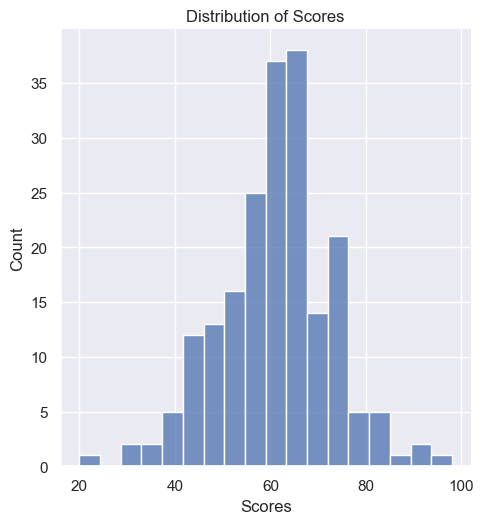

In [32]:
sns.set_theme()
sns.displot(data=scores_data).set(title="Distribution of Scores", xlabel="Scores")

In [33]:
df_scores = pd.DataFrame(scores_data,columns=['score'])

In [34]:
df_scores

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
195,76.0
196,67.0
197,74.0
198,98.0


In [38]:
print("Mean:", df_scores.mean())
print( "Standard:",df_scores.std())

Mean: score    61.005
dtype: float64
Standard: score    11.854434
dtype: float64


In [40]:
lower_limit = df_scores.mean() - 3*df_scores.std()
upper_limit = df_scores.mean() + 3*df_scores.std()
print("Giới hạn dưới: ",lower_limit)
print("Giới hạn trên: ",upper_limit)

Giới hạn dưới:  score    25.441697
dtype: float64
Giới hạn trên:  score    96.568303
dtype: float64


In [50]:
df_scores_filtered=df_scores[(df_scores['score']>float(lower_limit))&(df_scores['score']<float(upper_limit))]
print(df_scores_filtered)

     score
0     75.0
1     56.0
2     67.0
3     65.0
4     63.0
..     ...
194   42.0
195   76.0
196   67.0
197   74.0
199   53.0

[198 rows x 1 columns]


**Mã phát hiện ngoại lệ bằng cách sử dụng điểm Z**

In [51]:
df_scores['z_score']=(df_scores['score'] - df_scores['score'].mean())/df_scores['score'].std()
df_scores.head()

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291


Lọc, giữ lại các điểm trong phạm vi [-3,3]

In [52]:
df_scores_filtered= df_scores[(df_scores['z_score']>-3) & (df_scores['z_score']<3)]

print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]


**Cách phát hiện các ngoại lệ bằng phạm vi liên tứ phân vị (IQR)**

Vẽ biểu đồ hình Boxplot

[Text(0.5, 1.0, 'Box Plot of Scores')]

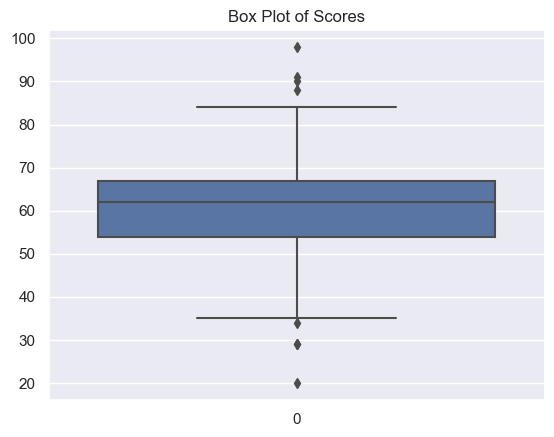

In [53]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [54]:
df_scores.describe()

,score,z_score
count,200.000000,2.000000e+02
mean,61.005000,-2.131628e-16
std,11.854434,1.000000e+00
min,20.000000,-3.459043e+00
25%,54.000000,-5.909181e-01
50%,62.000000,8.393484e-02
75%,67.000000,5.057179e-01
max,98.000000,3.120773e+00


In [80]:
Q3 = df_scores.quantile(0.75)[0] #Lấy giá trị score
Q1 = df_scores.quantile(0.25)[0]
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(upper_limit)
print(lower_limit)

86.5
34.5


In [81]:
df_scores_filtered = df_scores[(df_scores['score']>float(lower_limit)) & (df_scores['score']<float(upper_limit))]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[192 rows x 2 columns]


In [82]:
#Cách 2: 
q25,q75 = np.percentile(a = df_scores,q=[25,75])
IQR = q75 - q25
print(IQR)

61.91606516404945


**Cách phát hiện các ngoại lệ bằng cách sử dụng phần trăm***

In [84]:
lower_limit, upper_limit = np.percentile(a=df_scores,q=[0.5,99.5])
print("Upper_limit: ", upper_limit)
print("Lower_limit: ",lower_limit)

Upper_limit:  90.005
Lower_limit:  -2.6998335925602515


In [85]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]
